In [2]:
from http.client import responses

from langgraph.graph import StateGraph
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph.message import add_messages
from langchain_openai import ChatOpenAI

In [3]:
from langgraph.prebuilt import Tool

ImportError: cannot import name 'ChatOpenAI' from 'langgraph.prebuilt' (unknown location)

In [9]:
from dotenv import load_dotenv, find_dotenv
load_dotenv(find_dotenv(),override=True)

True

In [3]:
class State(TypedDict):
    messages: Annotated[list, add_messages]

graph_builder = StateGraph(State)

llm = ChatOpenAI(model="gpt-4o-mini", temperature=0.5)

def chatbot(state : State):
    return {"messages" : [llm.invoke(state["messages"])]}

graph_builder.add_node("chatbot", chatbot)
graph_builder.set_entry_point("chatbot")
graph_builder.set_finish_point("chatbot")

graph = graph_builder.compile()

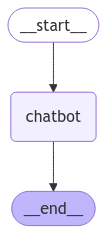

In [4]:
from IPython.display import display, Image
display(Image(graph.get_graph().draw_mermaid_png()))

To print graph in Ascii install, pip install grandalf

> print(graph.get_graph().draw_ascii())

In [6]:
while True:
    user_input = input('User: ')
    if user_input.lower() in ["q", "quit", "exit", "bye"]:
        print("Goodbye")
        break

    for event in graph.stream({'messages' : ('user', user_input)}):
        for value in event.values():
            print(f"assistant: {value['messages'][-1].content}")
            print('-' *20)

assistant: Paris is the capital city of France, known for its rich history, art, fashion, and culture. It is often referred to as "The City of Light" (La Ville Lumière) and is famous for landmarks such as the Eiffel Tower, the Louvre Museum, Notre-Dame Cathedral, and the Champs-Élysées. Paris is also renowned for its cuisine, with numerous cafes, bistros, and Michelin-starred restaurants. The city plays a significant role in global fashion and art, hosting numerous events and exhibitions throughout the year. Additionally, Paris is a hub for education and intellectual discourse, home to many prestigious universities and institutions. Would you like to know more about a specific aspect of Paris?
--------------------
Goodbye


In [11]:
from tavily import TavilyClient
import os

client = TavilyClient(api_key=os.environ['TAVILY_API_KEY'])

response = client.search(query="who won 2024 ipl")
response

{'query': 'who won 2024 ipl',
 'follow_up_questions': None,
 'answer': None,
 'images': [],
 'results': [{'title': 'Who won IPL 2024? What happened in the final between KKR and SRH?',
   'url': 'https://www.sportingnews.com/in/cricket/news/who-won-ipl-final-2024-kkr-srh/2d2abac1a403fa86e6c5afbd',
   'content': 'Who won IPL 2024? What happened in the final between KKR and SRH? | Sporting News India IPL IPL EXPLORE IPL NBA TEAMS EXPLORE FOOTBALL Cricket IPL NBA Football IPL Who won IPL 2024? Kolkata Knight Riders (KKR) beat Sunrisers Hyderabad (SRH) by eight wickets in the IPL 2024 Final at the MA Chidambaram Stadium in Chennai to lift a third IPL trophy on Sunday. With this result, KKR are now the third most successful team in the history of the league after Mumbai Indians and Chennai Super Kings who have won it five times each. MORE: Relive all the drama of the 2024 IPL Final here — IndianPremierLeague (@IPL) May 26, 2024 IPL Final 2024 result, score Sporting News',
   'score': 0.93221

In [12]:
for result in response['results']:
    print(f'Title: {result["title"]}, URL: {result["url"]}')

Title: Who won IPL 2024? What happened in the final between KKR and SRH?, URL: https://www.sportingnews.com/in/cricket/news/who-won-ipl-final-2024-kkr-srh/2d2abac1a403fa86e6c5afbd
Title: 2024 Indian Premier League final - Wikipedia, URL: https://en.wikipedia.org/wiki/2024_Indian_Premier_League_final
Title: 'We've played like invincibles' - Kolkata win IPL - BBC, URL: https://www.bbc.com/sport/cricket/articles/cd114e2l99qo
Title: TATA IPL 2024 , Final , KKR Vs SRH - Match Report, URL: https://www.iplt20.com/news/4106/tata-ipl-2024-final-kkr-vs-srh-match-report
Title: IPL 2024 Final: KKR crowned champions for 3rd time as SRH implode in ..., URL: https://www.indiatoday.in/sports/cricket/story/ipl-2024-final-kkr-vs-srh-kolkata-3rd-crown-shreyas-iyer-pat-cummins-chennai-2544139-2024-05-26


In [13]:
response = client.search(
    query="who won 2024 ipl",
    search_depth='advanced',
    max_results=7,
    include_images=True,
    include_answer=True,
    include_raw_content=False
)
response

{'query': 'who won 2024 ipl',
 'follow_up_questions': None,
 'answer': 'The Kolkata Knight Riders won the 2024 IPL by defeating the Sunrisers Hyderabad in the final.',
 'images': ['https://tse-mm.bing.com/th?q=2024+ipl+winner+final+time+android',
  'https://tse-mm.bing.com/th?q=2024+ipl+winner+final+time+show',
  'https://statico.sportskeeda.com/editor/2025/02/ec101-17407642472000-1920.jpg',
  'https://akm-img-a-in.tosshub.com/indiatoday/images/story/202405/ishant-sharma-140145588-16x9_0.jpg?VersionId=xDxHOHWdt2lOJVN59ZhlDbT9e_uxaM74&size=690:388',
  'https://tse1.mm.bing.net/th?q=2024+Ipl+Winner&w=1280&h=720&c=5&rs=1&p=0'],
 'results': [{'url': 'https://en.wikipedia.org/wiki/2024_Indian_Premier_League_final',
   'title': '2024 Indian Premier League final - Wikipedia',
   'content': 'The Kolkata Knight Riders easily chased the target in 10.3 overs and won the match by eight wickets, thus winning their third IPL title.[4] KKR player Mitchell Starc was named as the player of the match fo

In [14]:
answer = client.qna_search(query="who won 2024 ipl")
answer

'The Kolkata Knight Riders won the 2024 IPL by defeating the Sunrisers Hyderabad in the final.'

In [15]:
from langchain.adapters.openai import convert_openai_messages
from langchain_openai import ChatOpenAI

query = "who won 2024 ipl"

response = client.search(query=query, max_results=5, search_depth='advanced')['results']
response

[{'url': 'https://en.wikipedia.org/wiki/2024_Indian_Premier_League_final',
  'title': '2024 Indian Premier League final - Wikipedia',
  'content': 'The Kolkata Knight Riders easily chased the target in 10.3 overs and won the match by eight wickets, thus winning their third IPL title.[4] KKR player Mitchell Starc was named as the player of the match for taking 2 wickets and 2 catches.[5] Sunil Narine (KKR) was named as the player of the season for scoring 488 runs and taking 17 wickets throughout the tournament.[6] ^ a b c "IPL 2024 final result: Kolkata Knight Riders beat Sunrisers Hyderabad to win title".',
  'score': 0.91795975,
  'raw_content': None},
 {'url': 'https://www.bbc.com/sport/cricket/articles/cd114e2l99qo',
  'title': "'We've played like invincibles' - Kolkata win IPL - BBC",
  'content': 'IPL 2024 final result: Kolkata Knight Riders beat Sunrisers Hyderabad to win title - BBC Sport Kolkata Knight Riders won the Indian Premier League after a thumping eight-wicket win over

In [16]:
prompt = [
    {
        'role': 'system',
        'content': f'you are an AI critical thinker research assitant.'
                   f'your sole puprose is to write a well written, objective and structred reports on given text.'
    },
    {
        'role': 'user',\
        'content':f'Information {response}'
                  f'Using the above information, answer the following query: {query} in a detailed report'
    }
]

lc_messages = convert_openai_messages(prompt)
lc_messages

[SystemMessage(content='you are an AI critical thinker research assitant.your sole puprose is to write a well written, objective and structred reports on given text.', additional_kwargs={}, response_metadata={}),
 HumanMessage(content='Information [{\'url\': \'https://en.wikipedia.org/wiki/2024_Indian_Premier_League_final\', \'title\': \'2024 Indian Premier League final - Wikipedia\', \'content\': \'The Kolkata Knight Riders easily chased the target in 10.3 overs and won the match by eight wickets, thus winning their third IPL title.[4] KKR player Mitchell Starc was named as the player of the match for taking 2 wickets and 2 catches.[5] Sunil Narine (KKR) was named as the player of the season for scoring 488 runs and taking 17 wickets throughout the tournament.[6] ^ a b c "IPL 2024 final result: Kolkata Knight Riders beat Sunrisers Hyderabad to win title".\', \'score\': 0.91795975, \'raw_content\': None}, {\'url\': \'https://www.bbc.com/sport/cricket/articles/cd114e2l99qo\', \'title\':

In [17]:
response = ChatOpenAI(model="gpt-4o-mini", temperature=0.5).invoke(lc_messages)
print(response.content)

### Report on the 2024 Indian Premier League Final

#### Overview
The 2024 Indian Premier League (IPL) final, held on May 27, 2024, culminated in a significant victory for the Kolkata Knight Riders (KKR), who defeated the Sunrisers Hyderabad (SRH) by eight wickets. This victory marked KKR's third IPL title, showcasing their dominance in the tournament.

#### Match Summary
- **Final Match Result**: Kolkata Knight Riders won by 8 wickets.
- **Opponent**: Sunrisers Hyderabad.
- **Match Duration**: KKR chased their target in just 10.3 overs, demonstrating an aggressive and effective batting performance.

#### Key Performers
- **Player of the Match**: Mitchell Starc (KKR)
  - Achievements: 
    - Took 2 wickets.
    - Made 2 catches.
- **Player of the Season**: Sunil Narine (KKR)
  - Achievements:
    - Scored a total of 488 runs throughout the tournament.
    - Took 17 wickets, contributing significantly to KKR’s success over the season.

#### Context and Background
Before the final, the t

### Tools

In [10]:
from langchain_community.tools.tavily_search import TavilySearchResults
tool = TavilySearchResults(max_results=5)
tools = [tool]

In [18]:
response = tool.invoke('what is gpt4.5')
response

[{'url': 'https://venturebeat.com/ai/openai-releases-gpt-4-5/',
  'content': 'It’s here: OpenAI has announced the release of GPT-4.5, a research preview of its latest and most powerful large language model (LLM) for chat applications. During the livestream, OpenAI researchers noted how it was trained on data generated by smaller AI models and that this improved its “world model.” They also stated it was pre-trained across multiple data centers concurrently, suggesting a decentralized approach similar to that of rival lab Nous Research. At the same time, the pricing for GPT-4.5 through OpenAI’s API for third-party developers looking to build applications on the model appears shockingly high, at $75/$180 per million input/output tokens compared to $2.50/$10 for GPT-4o. As AI continues to evolve, GPT-4.5 marks another milestone in OpenAI’s pursuit of more capable, reliable, and user-aligned language models, promising new opportunities for innovation in the enterprise landscape.'},
 {'url'

In [19]:
llm.bind_tools(tools)

RunnableBinding(bound=ChatOpenAI(client=<openai.resources.chat.completions.completions.Completions object at 0x0000022BBEF70410>, async_client=<openai.resources.chat.completions.completions.AsyncCompletions object at 0x0000022BBEF73380>, root_client=<openai.OpenAI object at 0x0000022BBEC8D250>, root_async_client=<openai.AsyncOpenAI object at 0x0000022BBEF70470>, model_name='gpt-4o-mini', temperature=0.5, model_kwargs={}, openai_api_key=SecretStr('**********')), kwargs={'tools': [{'type': 'function', 'function': {'name': 'tavily_search_results_json', 'description': 'A search engine optimized for comprehensive, accurate, and trusted results. Useful for when you need to answer questions about current events. Input should be a search query.', 'parameters': {'properties': {'query': {'description': 'search query to look up', 'type': 'string'}}, 'required': ['query'], 'type': 'object'}}}]}, config={}, config_factories=[])

In [20]:
import json

from langchain_core.messages import ToolMessage


class BasicToolNode:
    """A node that runs the tools requested in the last AIMessage."""

    def __init__(self, tools: list) -> None:
        self.tools_by_name = {tool.name: tool for tool in tools}

    def __call__(self, inputs: dict):
        if messages := inputs.get("messages", []):
            message = messages[-1]
        else:
            raise ValueError("No message found in input")
        outputs = []
        for tool_call in message.tool_calls:
            tool_result = self.tools_by_name[tool_call["name"]].invoke(
                tool_call["args"]
            )
            outputs.append(
                ToolMessage(
                    content=json.dumps(tool_result),
                    name=tool_call["name"],
                    tool_call_id=tool_call["id"],
                )
            )
        return {"messages": outputs}


tool_node = BasicToolNode(tools=[tool])
graph_builder.add_node("tools", tool_node)

Adding a node to a graph that has already been compiled. This will not be reflected in the compiled graph.


In [21]:
graph_builder.compile()

ReadTimeout: HTTPSConnectionPool(host='mermaid.ink', port=443): Read timed out. (read timeout=10)